In [179]:
import pandas as pd
import numpy as np

## Multi-indexing

Suppose you would like create a table which shows population change from 2000 to 2010 for different state,
- For California, total number of population was 33871648, then in 2010, it decreased to 37253956
- For New York, total number of population was 18976457, then in 2010, it increased to 19378102
- For Texas, total number of population was 20851820, then in 2010, it increased to 25145561

### Single-indexed Table
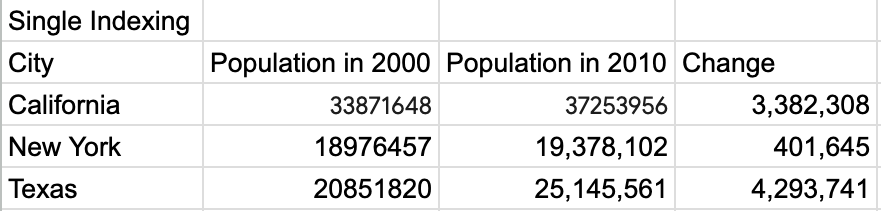

In [180]:
columns = ["Population in 2000", "Population in 2010"]
index = ["California", "New York", "Texas"]
data = [[33871648,37253956],[18976457,19378102],[20851820,25145561]] # to make it 2D array of 3 x 2

In [181]:
df = pd.DataFrame(data=data, index=index,columns=columns)
df["Change"] = df["Population in 2010"] - df["Population in 2000"]
df

,Population in 2000,Population in 2010,Change
California,33871648,37253956,3382308
New York,18976457,19378102,401645
Texas,20851820,25145561,4293741


In [182]:
# To find the population of California in 2010,
df.loc["California"]["Population in 2010"]

37253956

**Advantage of Single-index table version:**
- straight-forward
- intuitive to understand the change in population from 2000 to 2010

### Multi-index version

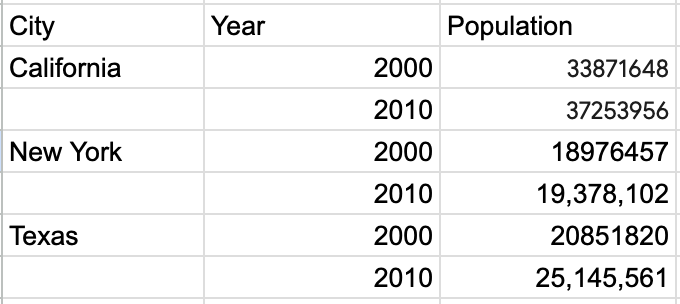

- population: 1D Array of 6 x 1
- index: Multi-index of City and Year

In [183]:
from itertools import product

columns = ["Population"] 
cities = ["California", "New York", "Texas", "Seattle"]
years = ["2000", "2010"]
index_tuples = []
# process multi-index with tuple
# [('California', '2000'), ('California', '2010'), ('New York', '2000'), ('New York', '2010'), ('Texas', '2000'), ('Texas', '2010')]
for i in range(len(cities)):
  for j in range(len(years)):
    index_tuples.append((cities[i],years[j]))

# ...to do this in a smarter way, use the concept of cross-product
# (a + b + c)(x + y) = ax + bx + cx + ay + by + cy

# this is in fact taking very similar approach with how we created multi-index above
# ["California", "New York", "Texas"] * ["2000", "2010"] = [('California', '2000'), ('California', '2010'), ('New York', '2000'), ('New York', '2010'), ('Texas', '2000'), ('Texas', '2010')]
# then,

index_tuples = list(product(cities, years))
print(index_tuples)

california_pops = [33871648,37253956]
new_york_pops = [18976457,19378102]
texas_pops = [20851820,25145561]
seattle_pops = [21231450,28455683]

data = california_pops + new_york_pops + texas_pops + seattle_pops

[('California', '2000'), ('California', '2010'), ('New York', '2000'), ('New York', '2010'), ('Texas', '2000'), ('Texas', '2010'), ('Seattle', '2000'), ('Seattle', '2010')]


`index_tuples`: this is our ingredient to create multi-index, where:
- string before comma is the first level of index
- string after comma is the second level of index

In [184]:
index_tuples

[('California', '2000'),
 ('California', '2010'),
 ('New York', '2000'),
 ('New York', '2010'),
 ('Texas', '2000'),
 ('Texas', '2010'),
 ('Seattle', '2000'),
 ('Seattle', '2010')]

In [185]:
index_multi = pd.MultiIndex.from_tuples(index_tuples, names=["City", "Year"])
index_multi

MultiIndex([('California', '2000'),
            ('California', '2010'),
            (  'New York', '2000'),
            (  'New York', '2010'),
            (     'Texas', '2000'),
            (     'Texas', '2010'),
            (   'Seattle', '2000'),
            (   'Seattle', '2010')],
           names=['City', 'Year'])

build column for multi-index

In [186]:
df_multi = pd.DataFrame(data=data, index=index_multi, columns=columns)
df_multi

Population
City       Year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561
Seattle    2000    21231450
           2010    28455683

Advantage of Multi-index
- easy to understand
- scalable: We can freely add more cities, and population information by years
- easier query

In [187]:
df_multi.loc[("California", "2010")] # querying population data of California in 2010

Population    37253956
Name: (California, 2010), dtype: int64

In [188]:
df_multi

Population
City       Year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561
Seattle    2000    21231450
           2010    28455683

To convert this back to single-index,

In [189]:
df_unstacked = df_multi.unstack()
df_unstacked

Population          
Year             2000      2010
City                           
California   33871648  37253956
New York     18976457  19378102
Seattle      21231450  28455683
Texas        20851820  25145561

To convert back to multi-index,

In [190]:
df_unstacked.stack()

/var/folders/0k/m73nng4s2yvg3lv2zdl3dff80000gn/T/ipykernel_93434/2796931009.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_unstacked.stack()


Population
City       Year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Seattle    2000    21231450
           2010    28455683
Texas      2000    20851820
           2010    25145561

### Indexing Multi-index DataFrame

We upgrade the `df_multi`, which includes the change over 2000 and 2010

In [191]:
df_multi

Population
City       Year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561
Seattle    2000    21231450
           2010    28455683

In [192]:
# unstack it to easily find the change
df_multi_unstacked = df_multi.unstack()
df_multi_unstacked

Population          
Year             2000      2010
City                           
California   33871648  37253956
New York     18976457  19378102
Seattle      21231450  28455683
Texas        20851820  25145561

In [193]:
df_multi_unstacked["Change", "2000"] = np.NaN
df_multi_unstacked["Change", "2010"] = df_multi_unstacked["Population"]["2010"]-df_multi_unstacked["Population"]["2000"]
df_multi_unstacked

Population           Change         
Year             2000      2010   2000     2010
City                                           
California   33871648  37253956    NaN  3382308
New York     18976457  19378102    NaN   401645
Seattle      21231450  28455683    NaN  7224233
Texas        20851820  25145561    NaN  4293741

Stack it back to multi-index

In [194]:
df_multi_v2 = df_multi_unstacked[["Population", "Change"]].stack()
df_multi_v2

/var/folders/0k/m73nng4s2yvg3lv2zdl3dff80000gn/T/ipykernel_93434/3209265014.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_multi_v2 = df_multi_unstacked[["Population", "Change"]].stack()


Population     Change
City       Year                       
California 2000    33871648        NaN
           2010    37253956  3382308.0
New York   2000    18976457        NaN
           2010    19378102   401645.0
Seattle    2000    21231450        NaN
           2010    28455683  7224233.0
Texas      2000    20851820        NaN
           2010    25145561  4293741.0

In [164]:
# getting particular column (vertical search)
df_multi_v2["Population"]

City        Year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Seattle     2000    21231450
            2010    28455683
Texas       2000    20851820
            2010    25145561
Name: Population, dtype: int64

In [195]:
# getting data from California to Seattle using slicing (from where to where? = ':')
df_multi_v2.loc["California":"Seattle"]

Population     Change
City       Year                       
California 2000    33871648        NaN
           2010    37253956  3382308.0
New York   2000    18976457        NaN
           2010    19378102   401645.0
Seattle    2000    21231450        NaN
           2010    28455683  7224233.0

In [175]:
# getting a particular cell: suppose I want to query the population change in 2010 at California (Vertical -> Horizontal search)
df_multi_v2["Change"].loc["California", "2010"]

3382308.0

In [ ]:
# getting the rows of data of which the change is larger than 500000
df_multi_v2[df_multi_v2["Change"] > 500000.0]

,,Population,Change
City,Year,,
California,2010,37253956,3382308.0
Seattle,2010,28455683,7224233.0
Texas,2010,25145561,4293741.0


In [209]:
# drop all NaNs
df_multi_v2[df_multi_v2["Change"].notna()]

,,Population,Change
City,Year,,
California,2010,37253956,3382308.0
New York,2010,19378102,401645.0
Seattle,2010,28455683,7224233.0
Texas,2010,25145561,4293741.0


In [ ]:
# HW
# 1. get New Yorks's population in 2000 from `df_multi_v2`
# 2. get Seattle's population change from `df_multi_v2`
# 3. build a new dataframe called `df_multi_v3`, wher v3 includes a new column called "Population mean", which is the mean value of population between 2000 and 2010